In [1]:
# # For logging in to hugging face
# from huggingface_hub import notebook_login
# notebook_login()

## For joint Inference and then data collection pipleline implement the steps below: 

1. **Write Class `S2S1Runner` To run the inference loop:** run S2 then S1.step_untill(sub_task), this repeats untill the robot achive the final objective.

2. **Write Class S1Manual control:** This should be similar to S1Inference, with the difference of having maual control in the S1.step_untill(sub_task) function. you can find more about how to integrate manual control inside the class through this file: `minigrid-challenge/play.py`

3. **Integrate collecting the data and saving it to `S2S1Runner` pipeline:** This should an input parameter `collect_data`, it case it's true. collect episodes where every episode have this list of S2-S1 iterations, where S2 is infered (input, output) stored, the S1 manual control data is collected (model input `obs`, model output `action`).




In [1]:
# %reload_ext autoreload
# %autoreload 2
# from VLA2Systems.joint_inference import System2Inference
# config_path = "./configs/joint_inference.yaml"
# S2Model = System2Inference(config_path)


In [2]:
# random index from the dataset
# output = S2Model(1)

In [3]:
# print(output)

In [1]:
%reload_ext autoreload
%autoreload 2
import random
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
import torch
import imageio

# env_name = "BabyAI-ActionObjDoor-v0"
# env_name = "BabyAI-OneRoomS8-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
env_name = "BabyAI-FindObjS5-v0"
# env_name = "BabyAI-BossLevel-v0"
# env_name = "MiniGrid-MultiRoom-N6-v0"
# env_name = "MiniGrid-MultiRoom-N4-S5-v0"
# env_name = "BabyAI-UnlockToUnlock-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
seed = random.randint(1, 1000)
env = gym.make(env_name, render_mode="rgb_array")
from VLA2Systems.joint_inference import System2Inference
config_path = "./configs/joint_inference.yaml"
# Clear cache
torch.cuda.empty_cache()

S2Model = System2Inference(config_path, env, seed)



/home/tylerich/work/UTN_4/WS 24/mmfm/final_proj/Baby-AI-S2-S1-VLA/baby_vla/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tylerich/work/UTN_4/WS 24/mmfm/final_proj/Baby-AI-S2-S1-VLA/baby_vla/lib/python3.10/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
Could not load bitsandbytes native library: /home/tylerich/work/UTN_4/WS 24/mmfm/final_proj/Baby-AI-S2-S1-VLA/baby_vla/lib/python3.10/site-packages/bitsan

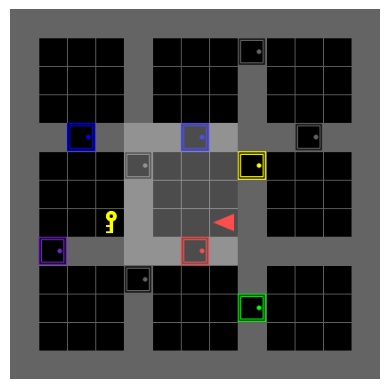

pick up the key


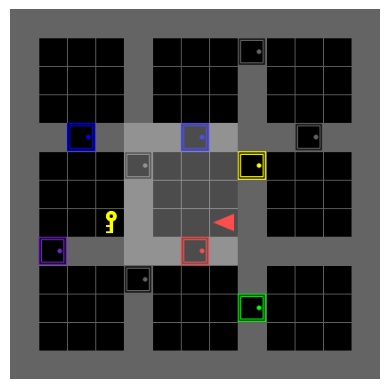

In [2]:
from VLA2Systems.joint_inference import System1Inferece
import random
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
import torch
import imageio

env_name = "BabyAI-ActionObjDoor-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
# seed = random.randint(1, 1000)
# env = gym.make(env_name, render_mode="rgb_array")
config_path = "./configs/joint_inference.yaml"

S1Model = System1Inferece(config_path, env)
# obs, _ = env.reset(seed=seed)
S1Model.config.verify = False
obs = S2Model.get_obs()
S1Model.step(obs["mission"], obs)
S1Model.config.verify = True
# obs["mission"]

pick up the ball


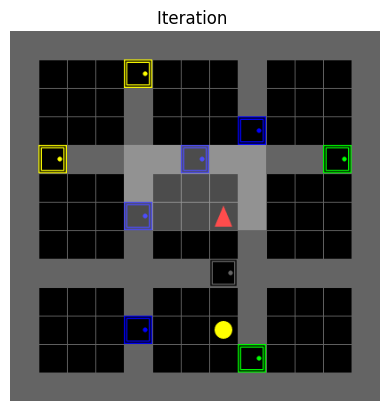

p 1: Open blue door
Step 2: Open blue door
Step 3: Pick up the ball


In [3]:
prompt = S2Model.get_input(env)
output = S2Model(env)
n = len(prompt)
response = output[n:]
print(S2Model.generator.mission)
S2Model.generator.visualize()
print(response)

KeyboardInterrupt: 

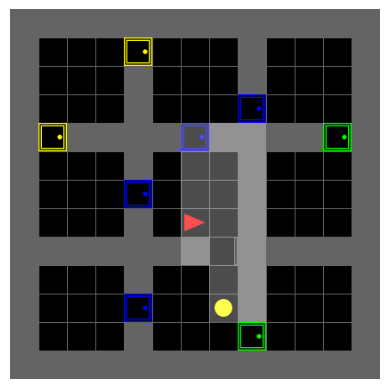

In [4]:
# sub_task = "go to the grey ball"
sub_tasks = response.split('\n')
print(sub_tasks[0])
S1Model.init_sub_task(sub_tasks[0], env)
S1Model.step_untill(sub_tasks[0], max_steps=100)


In [1]:

sub_tasks = response.split('\n')

for st in sub_tasks:
    print(st)
    S1Model.init_sub_task(st, env)
    S1Model.step_untill(st, max_steps=100)

NameError: name 'response' is not defined

/home/tylerich/work/UTN_4/WS 24/mmfm/final_proj/Baby-AI-S2-S1-VLA/baby_vla/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]


pick up the box


/home/tylerich/work/UTN_4/WS 24/mmfm/final_proj/Baby-AI-S2-S1-VLA/baby_vla/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]


pick up the ball


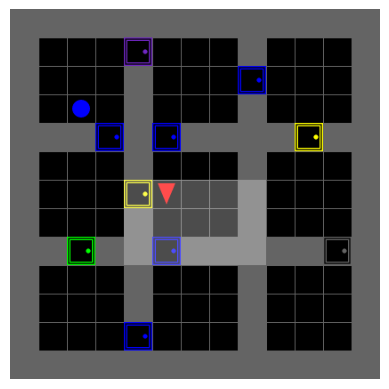

[('open', 'door', 'blue', (5, 4), None), ('open', 'door', 'purple', (4, 1), 1), ('pick_up', 'ball', '', None, 0)]
Step 1: Open blue door
open_door blue door  
Open
Sub-task completed: True


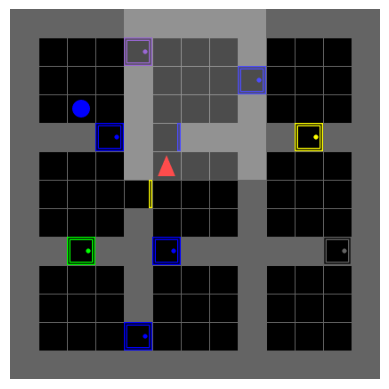

[('open', 'door', 'purple', (4, 1), 1), ('pick_up', 'ball', '', None, 0)]
Step 1: Open purple door
open_door purple door  
Open
Sub-task completed: True


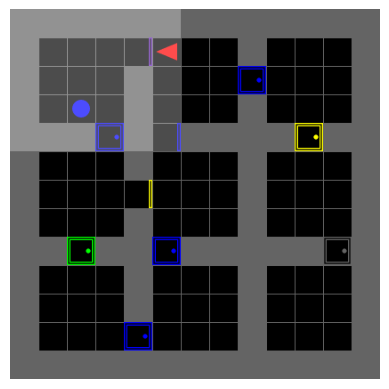

[('pick_up', 'ball', '', None, 0)]
Step 1: Pick up the ball
pick_up  ball  
Sub-task completed: False


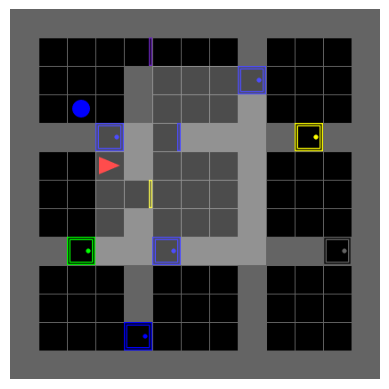

[('open', 'door', 'blue', (3, 4), None), ('pick_up', 'ball', '', None, 0)]
Step 1: Open blue door
open_door blue door  
Open
Sub-task completed: True


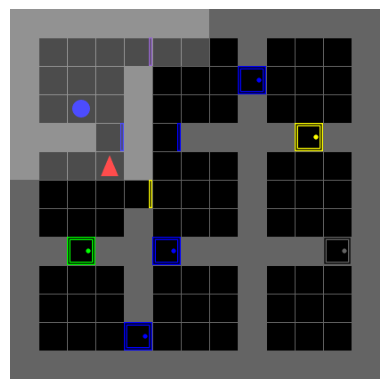

[('pick_up', 'ball', '', None, 0)]
Step 1: Pick up a ball
pick_up  ball  
Sub-task completed: False


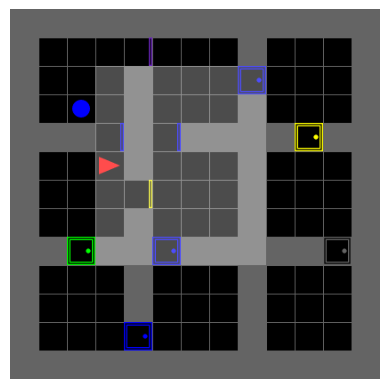

[('pick_up', 'ball', '', None, 0)]
Step 1: Pick up a ball
pick_up  ball  
Sub-task completed: False


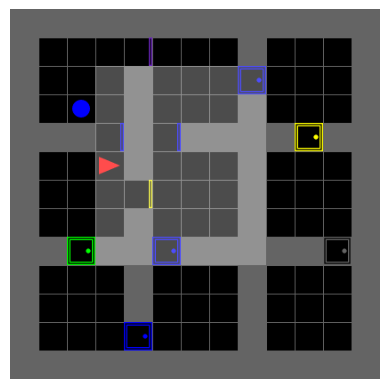

[('pick_up', 'ball', '', None, 0)]
Step 1: Pick up the ball
pick_up  ball  
Sub-task completed: True


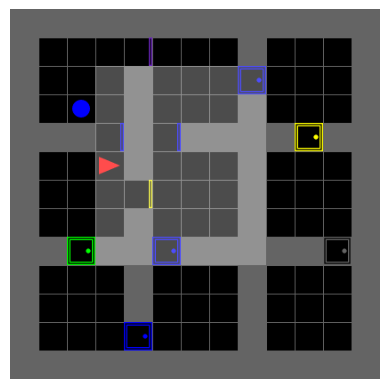

[('pick_up', 'ball', '', None, 0)]
Step 1: Pick up the ball
pick_up  ball  
Sub-task completed: True


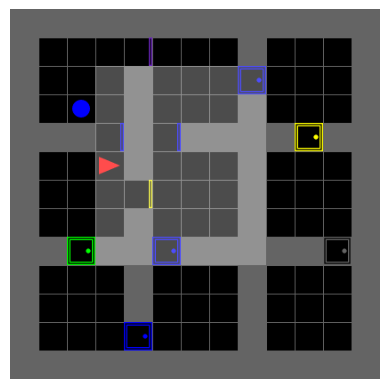

[('pick_up', 'ball', '', None, 0)]
Step 1: Pick up a ball
pick_up  ball  
Sub-task completed: True


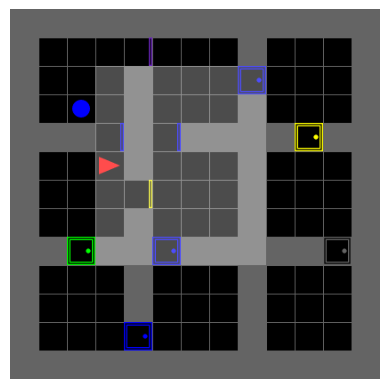

[('pick_up', 'ball', '', None, 0)]
Step 1: Pick up the ball
pick_up  ball  
Sub-task completed: True


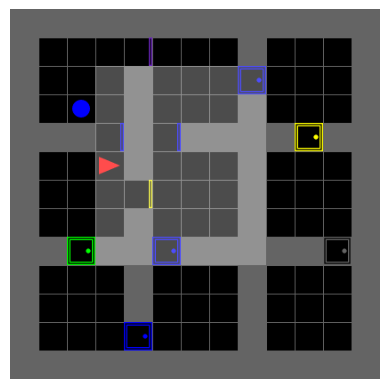

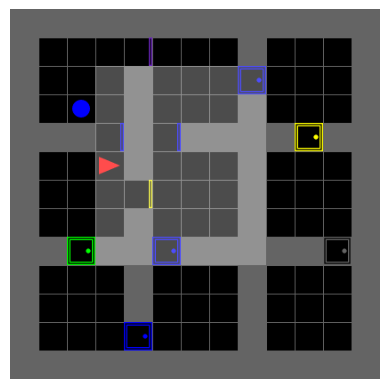

In [1]:
# Reset environment explicitly (optional)
#joint_system.reset() # Does not update mission!
from VLA2Systems.joint_inference import JointInference
import torch
torch.cuda.empty_cache()

config_path = "./configs/joint_inference.yaml"
#env_name = "BabyAI-FindObjS5-v0"
env_name = "BabyAI-Synth-v0"

joint_system = JointInference(config_path, env_name)
joint_system.print_mission()
joint_system.visualize()

# Run System2 and visualize output
for i in range(10):
    #response = joint_system.run_S2()
    response = joint_system.S2Model.get_planner_output(joint_system.S2Model.env)
    print(joint_system.S2Model.generator.plan)
    steps = response.split('\n')

    # Run System1 on the first sub-step.
    success = joint_system.run_S1(steps[0], max_steps=100)
    print("Sub-task completed:", success)

    joint_system.visualize()
    joint_system.S2Model.update_env(joint_system.S1Model.env)